# Investment Analysis Assignment - Sparks Fund

## Objective

 To understand the global trends in investments so that the company can take the investment decisions effectively. <br>Identify the best __sectors__, __countries__, and a __suitable investment type__ for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

## Business Constraints

* Invest between __5 to 15 million USD__ per round of investment.
* Invest only in __English-speaking countries__. 



### Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import requests, bs4
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set Parameters for Displaying data
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style("whitegrid")

### Get Countries Data from the Website

In [3]:
# Store the website url in url variable
url = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"
# use request object to get data from URL
req=requests.get(url)
# Create a soup object from beautifulSoup library  to convery request data as text
soup = bs4.BeautifulSoup(req.text, "html5lib")
#Create an empty list to store list of countries
countries=[]

In [4]:
# tables- to store all tables retrieved from the webpage
# Find all the tables of class - wikitable sortable
tables = soup.find('body').find_all('table',{'class':'wikitable sortable'})
#Find lengh og the Table Object to iterate
tablen=len(tables)
# Iterate over tables and extract the list of all the countries
#store the extracted countries in countries list
for i in range(tablen):
    link=tables[i].find_all('a')
    for link in link:
        countries.append(link.get('title'))

In [5]:
# Remove Unwanted and Redundant Data
# Convert list to a set and then back to a list
countrySet= set(countries)
#countrylist=list(countrySet)
countrylist = [i for i in list(countrySet) if i] # Remove None
#Create a DataFrame
countryDf= pd.DataFrame(countrylist,columns=["Country"])
countryDf.sort_values('Country',inplace=True)
#Remove Unwanted values from the DataFrame
countryDf = countryDf[countryDf['Country'] != 'De facto']
countryDf = countryDf[countryDf['Country'] != 'De jure'] 
countryDf['Country'] = countryDf['Country'].str.lower()
countryDf.head(2)

,Country
105,akrotiri and dhekelia
72,american samoa


### Loading the initial Files as DataFrame Object

In [6]:
# Create a DataFrame 'companies' which reads the source file - companies.txt
companies = pd.read_csv("companies.txt",sep='\t',encoding="ISO-8859-1")
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [7]:
# Create a DataFrame 'rounds' which reads the source file - rounds2.csv
rounds= pd.read_csv("rounds2.csv",encoding="ISO-8859-1")
rounds.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan


## Checkpoints - Part 1

## Understanding the Dataset

### Q.) How many __unique companies__ are present in __rounds2__?

In [8]:
# To get Total number of rows present in rounds2
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Boardvantage,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [10]:
#unique function shows the Number of Unique Items present in the list.
# Since 'Company_permlink' refers to key of a comany, finding unique 
# values of this column gives us the unique number of comapines
# We Also convert the companies to LowerCase, as Data is Case Sensitive
print("Unique Companies present in round2: ",rounds['company_permalink'].str.lower().nunique())

Unique Companies present in round2:  66370


__Answer:__ There are __66,370 unique__ companies present in rounds2.

### Q.) How many __unique companies__ are present in __companies__?

In [11]:
print("Unique Companies present in companies: ",companies['permalink'].str.lower().nunique())

Unique Companies present in companies:  66368


__Answer:__ There are __66,368 unique__ companies present in companies.

*We can see that there are **2 companies** in companies DF, which are not present in rounds2.*

### Q.) In the __companies__ data frame, which column can be used as the unique key for each company? Write the __name of the column__.

In [12]:
# Get info of all columns in companies
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [13]:
# Find number of unique rows in column which have all the values (No NaN)
print("Companies:",companies['permalink'].nunique())
print("Status:",companies['status'].nunique())

Companies: 66368
Status: 4


In the company DataFrame, permalink and status have all available values(No NaN).
The permalink column has all unique values and is also the unique identifier (a Primary Key) for company.

__Answer:__ __permalink__ can be used as unique key fro each company in companies.

### Q.) Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [14]:
print("Unique Companies present in round2: ",rounds['company_permalink'].str.lower().nunique())
print("Unique Companies present in companies: ",companies['permalink'].str.lower().nunique())

Unique Companies present in round2:  66370
Unique Companies present in companies:  66368


There are 2 companies which are rounds2 which are not present in companies. <br>
#### Answer: Y

### Q.) Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

First, Lets Convert the columns to lowercase, so that we can merge the keys for both DataFrames.

In [15]:
companies['permalink'] = companies['permalink'].str.lower()
rounds['company_permalink'] = rounds['company_permalink'].str.lower()

Now, lets rename the column permalink, so that we can merge both dataframes on this observation.

In [16]:
companies.rename(columns= {'permalink':'company_permalink'},inplace=True)

Now, we need to merge the rows in companies to all the rows in rounds2. <br>
This means getting all rows from companies and only mat

In [17]:
master_frame = pd.merge(rounds, companies, how='inner', on='company_permalink')
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00","(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,"41,250.00",01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,"43,360.00",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,"719,491.00",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,"3,000,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


### Before we proceed, let's understand and cleanse the _master frame_ 

In [18]:
master_frame.shape

(114942, 15)

In [19]:
#Number of Null Values in each coulumn
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [20]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 15 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


We can note the below points:
1. There are total 15 columns and 1,14,942 rows.
2. The columns - company_permalink, funding_round_permalink ,funding_round_type,funded_at and status does not have any NaN.
3. The raised_amount_usd column if float type. and has missing values. NaN can be replaced with 0.
4. funded_at is an Object Type and can be converted to Date.
5. Status, funding_round_type can be category variable.
6. The Catrgory_list column contains | seperated Sectors. We need to identify primary sector for each round.


#### Remove rows with NaN in `raised_amount_usd`

In [21]:
#master_frame['raised_amount_usd']
master_frame['raised_amount_usd'].dropna(axis=0,inplace=True)

In [22]:
# Convert 'funded_at' to DateTime
master_frame['funded_at'] = pd.to_datetime(master_frame['funded_at']) 

In [23]:
master_frame['funding_round_code'] = master_frame['funding_round_code'].astype('category')
#master_frame['funding_round_type'] = master_frame['funding_round_type'].astype('category')
master_frame['status'] = master_frame['status'].astype('category')

In [24]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-01-03,"700,000.00",:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,"3,406,878.00","(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,"2,000,000.00",0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [25]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 15 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null category
funded_at                  114942 non-null datetime64[ns]
raised_amount_usd          94958 non-null float64
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null category
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: category(2), datetime64[ns](1), float64(1), object(11)
memory usage: 12.5+ MB


## Checkpoint 2: Funding Type Analysis

#### Spark Funds wants to choose one of the four investment types for each potential investment they will make.

__1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1__


__First, lets filter out the rows in master Frame, where funding_round_type is only the type Sparks Fund is interested in.__

In [26]:
master_frame_type = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]


__Now, Lets create a groupby Object and caclulate the Reresentative value for column - raised_amount_usd.__

*The Representative Value Means the Average or Mean value of the column*

In [27]:
master_frame_type.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity   73,308,593.03
venture          11,748,949.13
angel               958,694.47
seed                719,779.62
Name: raised_amount_usd, dtype: float64

__2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?__

For Venture, angel and seed, the representative value lies in the range __5-15 million__. Hence, we will go for the maximum value and select - __venture__

For further analysis, let's filter the data so it only contains the chosen investment type.

In [28]:
master_frame=master_frame_type

## Checkpoint 3: Country Analysis

Now, we have ensured that the Type of funding is __Venture__, now we will analyse the best English speaking country for our investment.

In [29]:
# Let's create a master frame to keep only venture Data:
master_frame_venture= master_frame.copy()
master_frame_venture = master_frame_venture[master_frame_venture['funding_round_type'].isin(['venture'])]
master_frame_venture.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


### Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

_1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)_

In [30]:
master_frame_venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA   422,510,842,796.00
CHN    39,835,418,773.00
GBR    20,245,627,416.00
IND    14,391,858,718.00
CAN     9,583,332,317.00
FRA     7,259,536,732.00
ISR     6,907,514,579.00
DEU     6,346,959,822.00
JPN     3,363,676,611.00
Name: raised_amount_usd, dtype: float64

In [31]:
top9 = master_frame_venture[master_frame_venture['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]
top9= top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
# Convert the Series to a DataFrame
top9=top9.to_frame()
#Add a Column that gives the names of the countries
top9["Country"]= ["united states",'china','united kingdom','india',' canada','france','israel','germany','japan']
top9.head(3)

,raised_amount_usd,Country
country_code,,
USA,"422,510,842,796.00",united states
CHN,"39,835,418,773.00",china
GBR,"20,245,627,416.00",united kingdom


#### We  need to ensure that these countries have english as a Formal language.
<br>
For that, we need validate if these countries are present in `countries` Data Frame created earlier.

In [32]:
top3_eng= pd.merge(top9,countryDf, on="Country", how='inner')
top3_eng.head(3)

,raised_amount_usd,Country
0,"422,510,842,796.00",united states
1,"20,245,627,416.00",united kingdom
2,"14,391,858,718.00",india


## Checkpoint 4: Sector Analysis 1

### 1. Extract the primary sector of each category list from the category_list column

During the Data Analysis, we noticed that the values in `category_list` column are seperated by `|`. <br>
On Discussing with the CEO of Sparks, we defined a __business rule__ that the first string before the vertical bar will be considered the __primary sector__. 

In [33]:
# Lets define a function to get primary_sector for each category_list
def get_primary_sector(sec):
    res = sec.split('|')
    if len(res) > 1:
        return res[0]
    else:
        return sec

Now, we need to apply the function to the columns, replace Null with Not Defined and creat a new column - `primary_sector`

In [34]:
#master_frame['category_list']
#Replace NaN with "Not Defined"
master_frame.loc[:,'category_list'].fillna("Not Defined",inplace=True)
# Create New Column - "Primary Sector" and apply the creatwed function to get primary Sectors
master_frame.loc[:,'primary_sector'] = master_frame.loc[:,'category_list'].apply(get_primary_sector).str.lower()
#Change the Datatype of new sector
#master_frame.loc[:,'primary_sector']= master_frame.loc[:,'primary_sector'].astype('category')

### 2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [35]:
#Let's load the mapping csv file into mapping DF
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")
mapping.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0


In [36]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [37]:
#We need to Unpivot the DataFrame to get list of Main Sectors and Primary Sectors
# unpivot id column = Category_list
main_sectors = pd.melt(mapping,id_vars=["category_list"])
#Filter rows which have value=0
main_sectors= main_sectors[main_sectors['value']!=0]
#Rename columns for merging
main_sectors.rename(columns={'category_list':'primary_sector','variable':'main_sector'},inplace=True)
#drop extra columns
main_sectors.drop('value', axis=1,inplace=True)
main_sectors['primary_sector']= main_sectors['primary_sector'].str.lower()
main_sectors.sort_values('primary_sector',inplace=True)
main_sectors.head(2)

,primary_sector,main_sector
1847,0notechnology,Cleantech / Semiconductors
1848,0tural language processing,Cleantech / Semiconductors


We notice that instead on `na` the mapping column has `0`. 
<br> Example: **0**notechnology instead of __na__notechnology
<br>We need to replace this.

In [38]:
main_sectors['primary_sector'] = main_sectors['primary_sector'].apply(lambda x: re.sub('[0]', 'na', str(x)))
main_sectors.head(2)

,primary_sector,main_sector
1847,nanotechnology,Cleantech / Semiconductors
1848,natural language processing,Cleantech / Semiconductors


In [39]:
main_sectors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 1847 to 688
Data columns (total 2 columns):
primary_sector    688 non-null object
main_sector       688 non-null object
dtypes: object(2)
memory usage: 16.1+ KB


In [40]:
master_frame= pd.merge(master_frame,main_sectors,how='left',on='primary_sector')
master_frame.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging"


## Checkpoint 5: Sector Analysis 2

__Aim__: To find out the most heavily invested main sectors in each of the three countries.

### 1.Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

* All the columns of the master_frame along with the primary sector and the main sector
* The total number (or count) of investments for each main sector in a separate column
* The total amount invested in each main sector in a separate column

Let's filter the rows from master_frame to contain only top3 English speaking countries.


In [41]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging"
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-01-03,"700,000.00",:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,"3,406,878.00","(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,apps,"News, Search and Messaging"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,"2,000,000.00",0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,curated web,"News, Search and Messaging"
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,software,Others
6,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,2009-11-09,"43,360.00",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,biotechnology,Cleantech / Semiconductors
7,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,2009-12-21,"719,491.00",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,biotechnology,Cleantech / Semiconductors
8,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,"3,000,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
9,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-09-11,"20,000,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"


In [42]:
#We will need a copy of master frame in Plotting.
master_frame_copy= master_frame.copy()
master_frame = master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]
master_frame.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging"


In [43]:
master_frame_copy

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging"
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-01-03,"700,000.00",:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging"
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,"3,406,878.00","(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,apps,"News, Search and Messaging"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,"2,000,000.00",0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,curated web,"News, Search and Messaging"
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,software,Others
6,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,2009-11-09,"43,360.00",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,biotechnology,Cleantech / Semiconductors
7,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,2009-12-21,"719,491.00",Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,biotechnology,Cleantech / Semiconductors
8,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,"3,000,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
9,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-09-11,"20,000,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"


Now, let's keep the rows where funding is between **5 to 15 million USD**.

In [44]:
master_frame= master_frame[master_frame['raised_amount_usd'].between(5000000,15000000)]

Now, let's create 3 Data Frames for three countries.

In [45]:
D1 = master_frame[master_frame['country_code'] == 'USA']
D1.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
11,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,2014-07-19,"8,900,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising"
15,/organization/1-800-publicrelations-inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,2015-01-02,"6,000,000.00","1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013,internet marketing,"Social, Finance, Analytics, Advertising"


In [46]:
D2 = master_frame[master_frame['country_code'] == 'GBR']
D2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
319,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,2014-09-29,"5,500,000.00",365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,android,"Social, Finance, Analytics, Advertising"
613,/organization/5app,/funding-round/6ff332e6b15150ba2365e743b408199e,seed,NaN,2014-12-06,"5,100,000.00",5app,http://5app.com/,Mobile|Software|Web Design|Web Development,operating,GBR,H9,London,London,01-01-2011,mobile,"News, Search and Messaging"


In [47]:
D3 = master_frame[master_frame['country_code'] == 'IND']
D3.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
181,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,2012-11-15,"6,369,507.00",21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,e-commerce,Others


Now, we need to add the **count** and **sum** for each **main_sector** 

In [48]:
#Let's Pivot the data main_sector wise and create a DataFrame
D1_pivot = D1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})
D2_pivot = D2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})
D3_pivot = D3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

In [49]:
D1= pd.merge(D1,D1_pivot, how='inner', on='main_sector')
D2= pd.merge(D2,D2_pivot, how='inner', on='main_sector')
D3= pd.merge(D3,D3_pivot, how='inner', on='main_sector')

#### Now, we have 3 DataFrames (D1, D2,D3) containing all the column of master_frame along with primary_sector, main_sector, count and sum

In [50]:
D1.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count,sum
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,2014-07-19,"8,900,000.00",H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics,"Social, Finance, Analytics, Advertising",2829,"24,680,842,626.00"
1,/organization/1-800-publicrelations-inc-,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,2015-01-02,"6,000,000.00","1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013,internet marketing,"Social, Finance, Analytics, Advertising",2829,"24,680,842,626.00"


In [51]:
D2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count,sum
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,2014-09-29,"5,500,000.00",365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,android,"Social, Finance, Analytics, Advertising",143,"1,173,555,728.00"
1,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,NaN,2014-03-06,"10,720,178.00",Acal Enterprise Solutions,http://acalenterprisesolutions.com,Information Technology,operating,GBR,J8,Nottingham,Nottingham,01-01-1990,information technology,"Social, Finance, Analytics, Advertising",143,"1,173,555,728.00"


In [52]:
D3.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,count,sum
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment,34,"293,830,000.00"
1,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,2014-10-28,"8,180,000.00",Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,entertainment,Entertainment,34,"293,830,000.00"


### Now, let's view the data in our Pivot DataFrames, to get the values  for Table 5.1

#### Analyse Data for D1( USA)

In [53]:
D1_pivot.sort_values('count',ascending=False)

,count,sum
main_sector,,
Others,3040,"27,093,828,149.00"
"Social, Finance, Analytics, Advertising",2829,"24,680,842,626.00"
Cleantech / Semiconductors,2466,"22,716,707,229.00"
"News, Search and Messaging",1634,"14,346,370,804.00"
Health,965,"8,670,415,735.00"
Manufacturing,822,"7,453,792,922.00"
Entertainment,609,"5,237,907,970.00"
Automotive & Sports,178,"1,545,521,856.00"


#### Analyse Data for D2( GBR)

In [54]:
D2_pivot.sort_values('count',ascending=False)

,count,sum
main_sector,,
Others,153,"1,332,944,436.00"
"Social, Finance, Analytics, Advertising",143,"1,173,555,728.00"
Cleantech / Semiconductors,133,"1,189,424,208.00"
"News, Search and Messaging",82,"673,988,167.00"
Entertainment,57,"496,421,949.00"
Manufacturing,45,"391,969,972.00"
Health,26,"231,537,510.00"
Automotive & Sports,17,"173,112,570.00"


#### Analyse Data for D3( IND)

In [55]:
D3_pivot.sort_values('count',ascending=False)

,count,sum
main_sector,,
Others,114,"1,045,909,507.00"
"Social, Finance, Analytics, Advertising",64,"573,449,550.00"
"News, Search and Messaging",53,"439,834,545.00"
Entertainment,34,"293,830,000.00"
Cleantech / Semiconductors,21,"173,980,000.00"
Manufacturing,21,"200,900,000.00"
Health,20,"173,740,000.00"
Automotive & Sports,13,"136,900,000.00"


 1. Total number of investments (count)

In [56]:
print("Total number of investments in Country 1 (USA) : ",D1_pivot['count'].sum())
print("Total number of investments in Country 2 (GBR) : ",D2_pivot['count'].sum())
print("Total number of investments in Country 3 (IND) : ",D3_pivot['count'].sum())

Total number of investments in Country 1 (USA) :  12543
Total number of investments in Country 2 (GBR) :  656
Total number of investments in Country 3 (IND) :  340


2. Total amount of investment (USD)

In [57]:
print("Total amount of investments in Country 1 (USA) : ",D1_pivot['sum'].sum())
print("Total amount of investments in Country 2 (GBR) : ",D2_pivot['sum'].sum())
print("Total amount of investments in Country 3 (IND) : ",D3_pivot['sum'].sum())

Total amount of investments in Country 1 (USA) :  111745387291.0
Total amount of investments in Country 2 (GBR) :  5662954540.0
Total amount of investments in Country 3 (IND) :  3038543602.0


3. Top sector (based on count of investments)

In [58]:
# We get the result simply by examining the Pivot DataFrames
print("Top Sector in Country 1 (USA) : Others")
print("Top Sector in Country 2 (GBR) : Others")
print("Top Sector in Country 3 (IND) : Others")

Top Sector in Country 1 (USA) : Others
Top Sector in Country 2 (GBR) : Others
Top Sector in Country 3 (IND) : Others


 4. Second-best sector (based on count of investments)

In [59]:
# We get the result simply by examining the Pivot DataFrames
print("Second-best Sector in Country 1 (USA) : Social, Finance, Analytics, Advertising")
print("Second-best Sector in Country 2 (GBR) : Social, Finance, Analytics, Advertising")
print("Second-best Sector in Country 3 (IND) : Social, Finance, Analytics, Advertising")

Second-best Sector in Country 1 (USA) : Social, Finance, Analytics, Advertising
Second-best Sector in Country 2 (GBR) : Social, Finance, Analytics, Advertising
Second-best Sector in Country 3 (IND) : Social, Finance, Analytics, Advertising


5. Third-best sector (based on count of investments)

In [60]:
# We get the result simply by examining the Pivot DataFrames
print("Third-best Sector in Country 1 (USA) : Cleantech / Semiconductors")
print("Third-best Sector in Country 2 (GBR) : Cleantech / Semiconductors")
print("Third-best Sector in Country 3 (IND) : News, Search and Messaging")


Third-best Sector in Country 1 (USA) : Cleantech / Semiconductors
Third-best Sector in Country 2 (GBR) : Cleantech / Semiconductors
Third-best Sector in Country 3 (IND) : News, Search and Messaging


6. Number of investments in the top sector

In [61]:
# We get the result simply by examining the Pivot DataFrames
print("Number of investments in Top Sector in Country 1 (USA) :",D1_pivot.loc['Others','count'])
print("Number of investments in Top Sector in Country 2 (GBR) :",D2_pivot.loc['Others','count'])
print("Number of investments in Top Sector in Country 3 (IND) :",D3_pivot.loc['Others','count'])

Number of investments in Top Sector in Country 1 (USA) : 3040
Number of investments in Top Sector in Country 2 (GBR) : 153
Number of investments in Top Sector in Country 3 (IND) : 114


 7. Number of investments in the second-best sector

In [62]:
# We get the result simply by examining the Pivot DataFrames
print("Number of investments in Second-best Sector in Country 1 (USA) :",D1_pivot.loc['Social, Finance, Analytics, Advertising','count'])
print("Number of investments in Second-best Sector in Country 2 (GBR) :",D2_pivot.loc['Social, Finance, Analytics, Advertising','count'])
print("Number of investments in Second-best Sector in Country 3 (IND) :",D3_pivot.loc['Social, Finance, Analytics, Advertising','count'])

Number of investments in Second-best Sector in Country 1 (USA) : 2829
Number of investments in Second-best Sector in Country 2 (GBR) : 143
Number of investments in Second-best Sector in Country 3 (IND) : 64


8. Number of investments in the third-best sector

In [63]:
# We get the result simply by examining the Pivot DataFrames
print("Number of investments in Third-best Sector in Country 1 (USA) :",D1_pivot.loc['Cleantech / Semiconductors','count'])
print("Number of investments in Third-best Sector in Country 2 (GBR) :",D2_pivot.loc['Cleantech / Semiconductors','count'])
print("Number of investments in Third-best Sector in Country 3 (IND) :",D3_pivot.loc['News, Search and Messaging','count'])

Number of investments in Third-best Sector in Country 1 (USA) : 2466
Number of investments in Third-best Sector in Country 2 (GBR) : 133
Number of investments in Third-best Sector in Country 3 (IND) : 53


 9. For the top sector count-wise (point 3), which company received the highest investment?

In [64]:
# We need to Group the data based on Count and the find the company
D1_company= D1[D1['main_sector'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)
D1_company

company_permalink
/organization/virtustream   64,300,000.00
/organization/capella       54,968,051.00
Name: raised_amount_usd, dtype: float64

In [65]:
D2_company= D2[D2['main_sector'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)
D2_company

company_permalink
/organization/electric-cloud   37,000,000.00
/organization/sensage          36,250,000.00
Name: raised_amount_usd, dtype: float64

In [66]:
D3_company= D3[D3['main_sector'] == "Others" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)
D3_company

company_permalink
/organization/firstcry-com   39,000,000.00
/organization/myntra         38,000,000.00
Name: raised_amount_usd, dtype: float64

In [67]:
# Observing the above result sets, we can find deduce the answers:
print("The company for Top Sector in Counry 1 (USA), which recieved the highest investment is: /organization/virtustream")
print('and total investment recieved is : ',D1_company.loc['/organization/virtustream'])
print('\n')
print("The company for Top Sector in Counry 2 (GBR), which recieved the highest investment is: /organization/electric-cloud")
print('and total investment recieved is : ',D2_company.loc['/organization/electric-cloud'])
print('\n')
print("The company for Top Sector in Counry 3 (IND), which recieved the highest investment is: /organization/firstcry-com")
print('and total investment recieved is : ',D3_company.loc['/organization/firstcry-com'])

The company for Top Sector in Counry 1 (USA), which recieved the highest investment is: /organization/virtustream
and total investment recieved is :  64300000.0


The company for Top Sector in Counry 2 (GBR), which recieved the highest investment is: /organization/electric-cloud
and total investment recieved is :  37000000.0


The company for Top Sector in Counry 3 (IND), which recieved the highest investment is: /organization/firstcry-com
and total investment recieved is :  39000000.0


 10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [68]:
D1_company2= D1[D1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)
D1_company2

company_permalink
/organization/choicestream   73,300,000.00
/organization/shotspotter    67,933,006.00
Name: raised_amount_usd, dtype: float64

In [69]:
D2_company2= D2[D2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)
D2_company2

company_permalink
/organization/celltick-technologies   37,500,000.00
/organization/mythings                34,000,000.00
Name: raised_amount_usd, dtype: float64

In [70]:
D3_company2= D3[D3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(2)
D3_company2

company_permalink
/organization/manthan-systems   50,700,000.00
/organization/komli-media       28,000,000.00
Name: raised_amount_usd, dtype: float64

In [71]:
# Observing the above result sets, we can find deduce the answers:
print("The company for Second-best Sector in Counry 1 (USA), which recieved the highest investment is: /organization/shotspotter")
print('and total investment recieved is : ',D1_company2.loc['/organization/shotspotter'])
print('\n')
print("The company for Second-best Sector in Counry 2 (GBR), which recieved the highest investment is: /organization/celltick-technologies")
print('and total investment recieved is : ',D2_company2.loc['/organization/celltick-technologies'])
print('\n')
print("The company for Second-best Sector in Counry 3 (IND), which recieved the highest investment is: /organization/manthan-systems")
print('and total investment recieved is : ',D3_company2.loc['/organization/manthan-systems'])

The company for Second-best Sector in Counry 1 (USA), which recieved the highest investment is: /organization/shotspotter
and total investment recieved is :  67933006.0


The company for Second-best Sector in Counry 2 (GBR), which recieved the highest investment is: /organization/celltick-technologies
and total investment recieved is :  37500000.0


The company for Second-best Sector in Counry 3 (IND), which recieved the highest investment is: /organization/manthan-systems
and total investment recieved is :  50700000.0


## Checkpoint 6: Plots

Now, we have to present our findings to the CEO of Spark Funds. We need the following plots:

__1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.__

Let's create a DataFrame specific to the plot.

In [72]:
master_frame_plt1= master_frame_copy
#master_frame_plt1= master_frame_plt1[master_frame_plt1['raised_amount_usd'].between(5000000,15000000)]
master_frame_plt1.loc[:,'raised_amount_usd'].fillna(0,inplace=True)
master_frame_plt1= master_frame_plt1[master_frame_plt1['funding_round_type'].isin(['venture', 'seed', 'private_equity'])]
master_frame_plt1.loc[:,'investment_in_mill'] = master_frame_plt1.loc[:,'raised_amount_usd'].astype(float)/1000000
master_frame_plt1.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,investment_in_mill
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment,10.00
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,0.00,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging",0.00


#### We will consider the below points for the Data Frame:
* Data is available for all countries
* Will consider 3 types of funding - venture, seed, private equity

In [73]:
master_frame_plt1['country_code'].unique()

array(['IND', 'USA', nan, 'CHN', 'CAN', 'CHL', 'GBR', 'FRA', 'AUS', 'ROM',
       'AUT', 'KOR', 'SWE', 'JPN', 'RUS', 'SGP', 'NOR', 'ESP', 'BEL',
       'IRL', 'ITA', 'ISR', 'NLD', 'CHE', 'BRA', 'BGR', 'SVN', 'JOR',
       'HUN', 'DEU', 'NGA', 'FIN', 'NZL', 'HKG', 'TUR', 'IDN', 'ARE',
       'CYP', 'POL', 'CRI', 'PRT', 'ARG', 'DNK', 'TWN', 'THA', 'SVK',
       'UKR', 'LTU', 'ISL', 'ZAF', 'MEX', 'CZE', 'VEN', 'URY', 'MUS',
       'KEN', 'PHL', 'MNE', 'VNM', 'GHA', 'PSE', 'MYS', 'PER', 'EGY',
       'PAN', 'LVA', 'GGY', 'ALB', 'HRV', 'EST', 'LBN', 'GRC', 'UGA',
       'PAK', 'NPL', 'LUX', 'COL', 'SAU', 'IRN', 'GTM', 'BAH', 'ARM',
       'BGD', 'MDA', 'SRB', 'TUN', 'ZWE', 'BRB', 'NIC', 'PRI', 'TTO',
       'BHR', 'CMR', 'CYM', 'ECU', 'SLV', 'BWA', 'MLT', 'ZMB', 'MKD',
       'TAN', 'GIB', 'BMU', 'HND', 'MCO', 'MMR', 'KAZ', 'QAT', 'MAR',
       'LIE', 'BLR', 'GEO', 'DOM', 'DZA', 'JAM', 'KNA', 'AZE', 'SEN',
       'RWA', 'UZB', 'MOZ', 'KWT', 'CIV', 'GRD', 'LAO', 'LKA', 'SOM',
       'SYC', '

In [74]:
master_frame_plt1['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity'], dtype=object)

In [75]:
# To calculate % of investment in each type
pl1_grp=((master_frame_plt1.groupby('funding_round_type')['raised_amount_usd'].sum() / sum(master_frame_plt1['raised_amount_usd']))*100).to_frame()

In [76]:
pl1_grp.rename(columns={'raised_amount_usd':'percent_invesment'},inplace=True)
master_frame_plt1= pd.merge(master_frame_plt1,pl1_grp,on='funding_round_type',how='inner')
master_frame_plt1.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,investment_in_mill,percent_invesment
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment,10.00,78.78
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,0.00,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,application platforms,"News, Search and Messaging",0.00,78.78


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


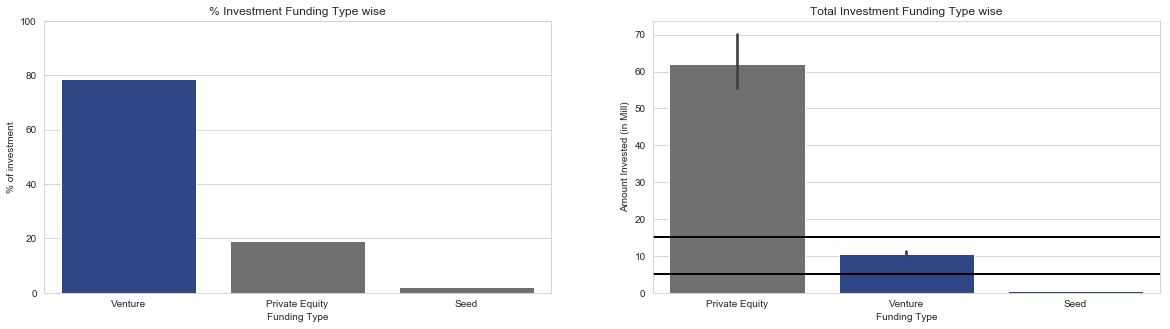

In [77]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
clrs = ["#707070" if (x < 50) else "#214093" for x in master_frame_plt1['percent_invesment'].unique() ]
bplot= sns.barplot(x='funding_round_type', y='percent_invesment', data=master_frame_plt1,order=['venture','private_equity','seed'],
            palette = clrs)
bplot.set(ylabel='% of investment', xlabel='Funding Type',title='% Investment Funding Type wise'
          ,xticklabels=['Venture','Private Equity','Seed']
    )
plt.ylim(0, 100)
plt.subplot(122)
clrs = ["#707070" if (x >=5 and x <=15) else "#214093" for x in master_frame_plt1['investment_in_mill'].unique()]
bplot= sns.barplot(x='funding_round_type', y='investment_in_mill', data=master_frame_plt1,order=['private_equity','venture','seed'],
            palette = clrs,estimator=np.mean)
bplot.set(ylabel='Amount Invested (in Mill)', xlabel='Funding Type',title='Total Investment Funding Type wise'
          ,xticklabels=['Private Equity','Venture','Seed'])
plt.axhline(y=5, linewidth=2, color = 'k')
plt.axhline(y=15, linewidth=2, color = 'k')
plt.show()

### Inferences:

* Contains Two Sub Plot
    * The First Plot depicts % of investement done across chosen funding type
    * The Second plot shows total amount invested (in Millions) along with a Confidence interval which shows average amount invested.

**The above plot clearly shows _venture_ as a prefeered investment type because:**
* Venture has maximum % invested (sub- plot1)
* Amount invested in venture suits the range for Sparks-Fund (5-15 Million USD)

### 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

Let's create a dataset for the plot which shows data for top 9 countries, barring Non- English speaking countries.

In [78]:
# We take copy of venture frame as we need to analyse Data only for venture FT
master_frame_plt2= master_frame_venture

In [79]:
# This contains data for All the Countries.
master_frame_plt2['country_code'].unique()
#Let's keep only for top 25 countries
top25_plt2 = master_frame_plt2[master_frame_plt2['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN','SWE','NLD','CHE','SGP','ESP','BRA','IRL','RUS','AUS'
,'DNK','BEL','FIN','NOR','KOR','MYS','HKG' ])]
#Now, lets group the data countrywise, based on total investments
top25_plt2=(top25_plt2.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)).to_frame()
#Let's Add Column Country Name for 15 countrues
top25_plt2['Country']= ["united states",'china','united kingdom','india',' canada','france','israel','germany','japan','sweden','netherlands','Switzerland','singapore','spain','brazil','republic of ireland','russia','australia','denmark',
                       'belgium','finland','norway','north korea','malaysia','hong kong']
top25_plt2= pd.merge(top25_plt2,countryDf, on="Country", how='inner')
top25_plt2.loc[:,'investment_in_mill'] = top25_plt2.loc[:,'raised_amount_usd'].astype(float)/1000000
top25_plt2.head(3)

,raised_amount_usd,Country,investment_in_mill
0,"422,510,842,796.00",united states,"422,510.84"
1,"20,245,627,416.00",united kingdom,"20,245.63"
2,"14,391,858,718.00",india,"14,391.86"


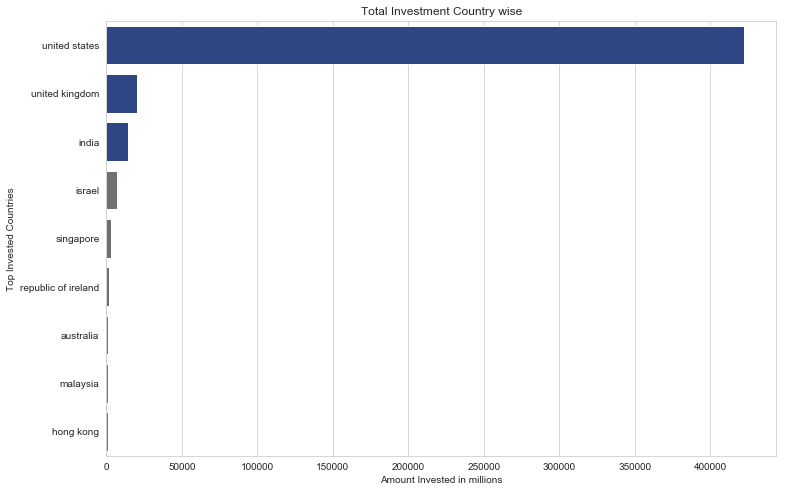

In [80]:
plt.figure(figsize=(12, 8))
clrs = ["#707070" if (x <= 10000) else "#214093" for x in top25_plt2['investment_in_mill'] ]
cplot= sns.barplot(y="Country", x="investment_in_mill", data=top25_plt2, estimator=sum,palette=clrs)
cplot.set(ylabel='Top Invested Countries', xlabel='Amount Invested in millions',title='Total Investment Country wise'
          )
plt.show()

### Inferences:

* Contains One Plot showing countries with moth investment in Venture
* Green Bars shows the top 3 countries

**The above plot clearly shows _top 3 countries_ as highly invested for type Venture**


### 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

Let's use the 3 Data Frames - D1,D2, and D3 that we created for Country Analysis and created new DF's based on them.

In [81]:
D1['funding_round_type'].unique()

array(['venture', 'private_equity', 'seed', 'angel'], dtype=object)

In [82]:
D1_plt3 = D1[D1['funding_round_type'].isin(['venture'])]
D1_plt3= (D1_plt3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).head(3)).to_frame().reset_index()
D1_plt3['Country']='USA'
D1_plt3.loc[:,'investment_in_mill'] = D1_plt3.loc[:,'raised_amount_usd'].astype(float)/1000000
D1_plt3

,main_sector,raised_amount_usd,Country,investment_in_mill
0,Others,2950,USA,0.00
1,"Social, Finance, Analytics, Advertising",2714,USA,0.00
2,Cleantech / Semiconductors,2350,USA,0.00


In [83]:
D2_plt3 = D2[D2['funding_round_type'].isin(['venture'])]
D2_plt3= (D2_plt3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).head(3)).to_frame().reset_index()
D2_plt3['Country']='GBR'
D2_plt3.loc[:,'investment_in_mill'] = D2_plt3.loc[:,'raised_amount_usd'].astype(float)/1000000
D2_plt3

,main_sector,raised_amount_usd,Country,investment_in_mill
0,Others,147,GBR,0.00
1,"Social, Finance, Analytics, Advertising",133,GBR,0.00
2,Cleantech / Semiconductors,130,GBR,0.00


In [84]:
D3_plt3 = D3[D3['funding_round_type'].isin(['venture'])]
D3_plt3= (D3_plt3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).head(3)).to_frame().reset_index()
D3_plt3['Country']='IND'
D3_plt3.loc[:,'investment_in_mill'] = D3_plt3.loc[:,'raised_amount_usd'].astype(float)/1000000
D3_plt3

,main_sector,raised_amount_usd,Country,investment_in_mill
0,Others,110,IND,0.00
1,"Social, Finance, Analytics, Advertising",60,IND,0.00
2,"News, Search and Messaging",52,IND,0.00


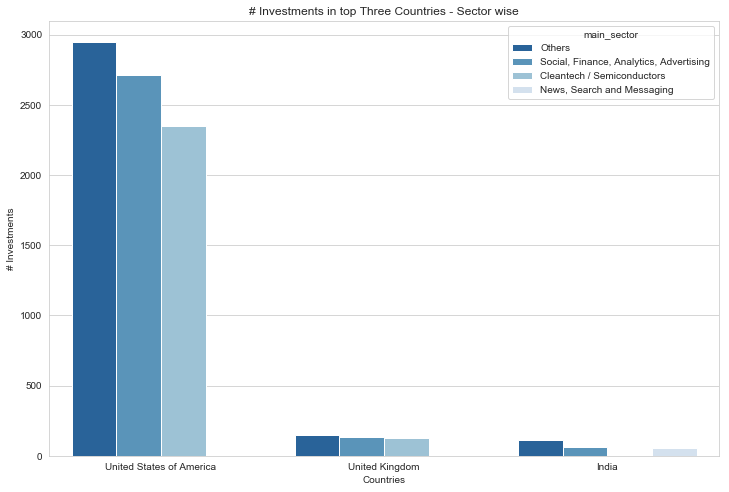

In [85]:
frames = [D1_plt3, D2_plt3, D3_plt3]
three_countries = pd.concat(frames)
plt.figure(figsize=(12, 8))
dplot= sns.barplot(x='Country', y='raised_amount_usd', hue="main_sector", data=three_countries, estimator=np.sum
                   ,palette="Blues_r")
dplot.set(ylabel='# Investments', xlabel='Countries',title='# Investments in top Three Countries - Sector wise'
          ,xticklabels=['United States of America','United Kingdom','India']
          )
plt.show()

### Inferences:

* Contains One Plot showing data for top Three countries with top 3 invested sectors
* Others is the most invested sector across countries

**The above plot clearly shows number of investments in _top 3 sectors_ for top3 countries for type Venture**
